In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import random
import pandas as pd
from nltk import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import re
!pip install konlpy
import konlpy
from konlpy.tag import Komoran
from pprint import pprint

print(konlpy.__version__)

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/크롤링데이터2/전체_데이터.xlsx')
df

In [ ]:
df = df[df['title'].isnull()==False]
df=df[df['content'].isnull()==False]
df

,title,date,content,likes,Effectiveness
0,섭식장애탈모생리불순에 관한 개인적인 경험글입니다 (매우긴글주의),2020.05.15,안녕하세요카페에 한지 이틀 되었습니다 겪고 계신 증상들에 대한 글들을 읽다가 심장이...,38,-320
1,토루의 사료이야기프립셉트 추천합니다스압주의,2008.12.21,주성분조단백질 이상조지방 이상조섬유 이하수 분 이하 마그네슘 이하칼 슘 이하 인 이...,0,-7
2,음식은 풍족하게 영양소는 부족하게 섭취,2014.09.23,현대를 사는 우리는 풍족한 음식을 섭취하지만 영양면에서는 굶주리고 있다 현재 토양오...,0,-148
3,탈모와 발모 도와주세요 (셀렌 아연 비타민복합군 영양치료),2015.05.13,탈모는 탈모증()라고도 부릅니다 완전탈모는 두피에 있는 머리카락이 모두 빠지는 것을...,0,7
4,영 양 의 학,2017.03.31,영 양 의 학 영양 식사 건강 기본 영양소 좋은 영양분은 건강의 기초이다 누구나 대...,0,-90
...,...,...,...,...,...
9519,탈모치료약은 몇가지 사용하시나요,2017.01.27,전 몇년동안 피나스테리드 약이랑 가족이 추천해준 비오틴만 복용해오다가효과가 미미해지...,0,15
9520,탈모약 먹다 안먹으면 가속화되나요,2018.02.12,아주 경미한 자 선고받아서 피나스테리드 받아왔는데 괜히 먹다가 안먹어서 탈모 가속화...,0,0
9521,프로스카 피나스트로 탈모용으로 먹을때 의사가 하루에 한알 달동안 먹으라고 하는데요...,2016.06.08,안녕하세요 저는 탈모로 고생하고 있는 탈모인입니다 실은 얼마전에 프로페시아가 좋다는...,0,2
9522,전두부 엠자탈모로 모발이식 고려중,2018.09.08,대 후반부터 전두부 탈모가 진행이 되어서피나스테리드 처방을 받아 미녹시딜과 함께 복...,0,0


In [ ]:
komoran_userdic = Komoran(userdic='./komoran_userdic_탈모약.txt')

In [ ]:
tokens2 = []

for sent in df['content']:
    s = []
    for pos in komoran_userdic.pos(sent):
        s.append(pos)
    tokens2.append(s)
len(tokens2)

9524

In [ ]:
word2=[]

#형용사, 동사, 부사
for token in tokens2:
    p = []
    for pos in token:
        if pos[1][:2]=='VA' or pos[1][:2]=='VV' or pos[1][:2]=='MA' and len(pos[0])>1:
            p.append(pos[0])
    word2.append(p)
len(word2)

9524

In [ ]:
print(word2[1004])

['힘들', '홀로', '외로이', '싸우', '함께', '좋', '남', '맞', '들려주', '하', '함께', '얻', '바라', '자', '모이', '없', '하', '되', '되', '나오', '올리', '빠지', '너무', '받', '위하', '모이', '받', '있', '바로']


In [ ]:
docs = []
for i in range(len(word2)):
    docs.append(' '.join(word2[i]))

docs[10]

'없 즉시 몰 패 울 패 있 나아가 같 같 갖 나타나 그리고 적어도 지나 펼치 있 매 옮기 줍 듣 되 가 가 잃어버리 만들 나쁘 다르 팔리 오 팔 나타내 혹시나 먹 되 있 지키 있 인정받 많이 들 있 되 보 보 바로 밝히 어떻 함께 보 있 특히 없 있 보 있 특히 없 있 보 맞 아쉽 받 쓰 있 보'

In [ ]:
len(docs)

9524

In [ ]:
def text_cleansing(text):
    list = ['댓글', '신고', '공유', '게시', '글 작성하기', '제휴', 
           '게시글', '더보기', '좋아요', '등록순', '최신순','새로고침', 
           '후기', '이벤트', '모네 상스', '병원', '경기', '등록', '작성', 
           '베스트', '리얼', '상담', '신청', '이야기', '회원', '정보', 
           '탈모 탈모', '회칙', '플러스', '가입', '홍보', '통보', '삭제', 
           '답변', '활동', '정지', '공지', '작성', '말머리', '답변', '설정', 
           '정보', '쪽지', '일정', '선물']
    for a in list:
        text = text.replace(a, '')

    return text

In [ ]:
docs = [text_cleansing(doc) for doc in docs]

In [ ]:
def eojeol(text, n=2):
    ngram = list()
    tokens = text.split()
    for i in range(len(tokens)-(n-1)):
        ngram.append(" ".join(tokens[i:i+n]))
    return ngram

In [ ]:
word3 = [word for doc in docs for word in eojeol(doc)]
pprint(word3[:20])

['하 되',
 '되 겪',
 '겪 계시',
 '계시 대하',
 '대하 읽',
 '읽 덜컹거리',
 '덜컹거리 들어가',
 '들어가 뼈저리',
 '뼈저리 알',
 '알 있',
 '있 심하',
 '심하 많이',
 '많이 대하',
 '대하 하',
 '하 같',
 '같 대하',
 '대하 뒤돌',
 '뒤돌 보',
 '보 어떻',
 '어떻 짚']


In [ ]:
len(word3)

1393080

In [ ]:
from collections import Counter
counter = Counter(word3)

In [ ]:
font_path = 'C:\\Windows\\fonts\\gulim.ttc'

wordcloud = WordCloud(
    font_path=font_path,
    width = 800,
    height = 800
)

In [ ]:
wordcloud = wordcloud.generate_from_frequencies(counter)

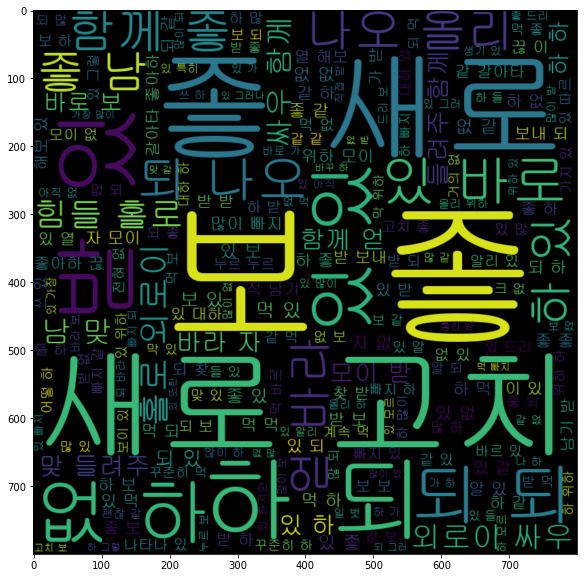

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()
#fig.savefig('두타스테리드-korean(2-gram).png')

In [ ]:
# KNU 한국어 감성사전
# 작성자 : 온병원, 박상민, 나철원
# 소속 : 군산대학교 소프트웨어융합공학과 Data Intelligence Lab
# 홈페이지 : dilab.kunsan.ac.kr
# 작성일 : 2018.05.14
# 뜻풀이 데이터 출처 : https://github.com/mrchypark/stdkor
# 신조어 데이터 출처 : https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%9D%B8%ED%84%B0%EB%84%B7_%EC%8B%A0%EC%A1%B0%EC%96%B4_%EB%AA%A9%EB%A1%9D
# 이모티콘 데이터 출처: https://ko.wikipedia.org/wiki/%EC%9D%B4%EB%AA%A8%ED%8B%B0%EC%BD%98
# SentiWordNet_3.0.0_20130122 데이터 출처 : http://sentiwordnet.isti.cnr.it/
# SenticNet-5.0 데이터 출처 : http://sentic.net/
# 감정단어사전0603 데이터 출처 : http://datascience.khu.ac.kr/board/bbs/board.php?bo_table=05_01&wr_id=91 
# 김은영, “국어 감정동사 연구”, 2004.02, 학위논문(박사) - 전남대학교 국어국문학과 대학원


#-*-coding:utf-8-*-

import json

class KnuSL():

	def data_list(wordname):	
		with open('KnuSentiLex-master/data/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
			data = json.load(f)
		result = ['None','None']	
		for i in range(0, len(data)):
			if data[i]['word'] == wordname:
				result.pop()
				result.pop()
				result.append(data[i]['word_root'])
				result.append(data[i]['polarity'])	
		
		r_word = result[0]
		s_word = result[1]
							
		print('어근 : ' + r_word)
		print('극성 : ' + s_word)		
		
		
		return r_word, s_word
    
	def data_list2(wordname):	
		with open('/content/drive/MyDrive/KnuSentiLex-master/data/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
			data = json.load(f)
		result = ['None','None']	
		p = -1
		for i in range(0, len(data)):
			if data[i]['word'] == wordname or data[i]['word_root'] == wordname:
				#result.pop()
				#result.pop()
				#result.append(data[i]['word_root'])
				#result.append(data[i]['polarity'])	
				p = int(data[i]['polarity'])
		return p
    
'''
if __name__ == "__main__":
	
	ksl = KnuSL
	
	print("\nKNU 한국어 감성사전입니다~ :)")
	print("사전에 단어가 없는 경우 결과가 None으로 나타납니다!!!")
	print("종료하시려면 #을 입력해주세요!!!")
	print("-2:매우 부정, -1:부정, 0:중립 or Unkwon, 1:긍정, 2:매우 긍정")
	print("\n")	

	while(True):
		wordname = input("word : ")
		wordname = wordname.strip(" ")		
		if wordname != "#":
			print(ksl.data_list(wordname))
			print("\n")	
				

		elif wordname == "#":
			print("\n이용해주셔서 감사합니다~ :)")
			break
'''

In [ ]:
ksl = KnuSL
p = []
for word in tqdm_notebook(word2):
    sum = 0
    a = 0
    for w in word:
      q = ksl.data_list2(w)
      if q != -1:
        sum += q
        a = 1  
    if (a == 0):
      p.append(0)
    else:
      p.append(sum)

NameError: ignored

In [ ]:
len(p) 


1005

In [ ]:
df['Effectiveness'] = p
df

-7
2
1
-8
3
1
3
-4
6
-2
-1
-67
-32
6
4
3
6
1
2
-2
5
-1
-13
-3
-7
7
2
11
-7
2
-8
-7
3
-9
-10
10
1
-1
3
-17
4
11
2
3
-10
0
-6
7
1
5
1
0
-32
-33
1
6
-10
0
-10
2
0
3
10
2
-11
-17
-81
-2
-36
0
0
5
-10
1
6
2
1
3
3
-7
1
-4
4
-35
-3
-19
-2
-17
-1
-47
22
-5
-15
5
7
-3
-2
0
3
-5
-10
12
-11
-7
3
-1
-7
-18
4
3
13
1
3
-6
1
-21
3
0
3
3
-4
-6
-10
7
-2
0
14
-5
-8
3
-14
-4
-13
-7
10
11
5
-25
-3
-2
0
5
-1
10
6
-5
5
3
-13
-10
3
15
-4
0
0
-7
6
10
-34
3
-1
-7
-21
1
-7
5
-36
0
-3
5
5
11
2
0
3
-2
18
5
-2
7
-6
4
1
13
-3
5
0
2
1
-1
-3
4
3
-1
-3
3
1
1
10
6
0
5
4
3
2
-2
-13
-29
1
-3
-16
8
-3
0
-1
4
5
-1
-20
-11
-11
3
-4
-4
4
9
3
11
19
0
-11
0
-6
5
-5
1
2
-18
13
5
8
-1
2
2
-27
13
3
3
-7
3
-11
9
-4
-12
0
-26
0
-5
13
46
15
10
-2
-19
4
6
6
10
4
-21
1
-14
-4
11
3
-13
9
-1
4
6
10
-11
7
-12
10
1
16
-5
-23
-30
26
7
-2
7
-20
4
-2
0
4
15
7
-5
-12
-41
0
-17
4
1
17
-1
-21
3
-4
4
1
-3
11
-12
-3
9
4
12
-4
-16
-8
-5
-10
11
-8
15
0
3
5
21
2
-1
-6
-5
3
-9
7
-21
1
-26
-20
-6
-18
-8
2
5
12
7
33
0
-20
-46
15
1
2
4
16
1
3
2
-2
-9
-7

In [ ]:
writer = pd.ExcelWriter('/content/drive/MyDrive/크롤링데이터2/전체데이터_추가.xlsx', options={'string_to_urls':False})
df.to_excel(writer, index=False)
writer.save()